## Linear Regression Project
    My motive of this project is to predict Sales of a business,based on amount spent on Advertising on 
    different platforms like TV,Radio,Social Media.Also they used influencers for promotion of their 
    business and to increase sales.They want to know,, Is it worth to spend much amount on multiple platforms?  I used Linear Regression and also Regularization methods ( L1,L2,ElasticNet )   

## About Dataset
    This dataset contains data of TV,Radio,Social Media,Influencer Ad's Budget and corresponding Sales for a       business 
### Columns
    1. TV    --> TV promotion Budget(in million dollars)
    2. Radio --> Radio promotion Budget(in million dollars)
    3. Social Media --> Social Media promotion Budget(in million dollars)
    4. Influencer --> Whether promotion collaborate with Mega,Macro,Nano,Micro influencer
    5. Sales  --> Sales(in million dollars)
    
    Mega influencers are those with more than a million followers(like celebrities)
    Macro influencers are those with 500k to 1 million followers
    Micro influencers are those with 1000 to 10,000 followers
    Nano influencers are those with 1000 to 5000 followers

     We are going to predict the Sales of a business based on the amount of budget they spent on running Ad's         on different platforms.
#### We will do
    1. Exploratory Data Analysis
    2. Dealing with Categorical columns,Null values
    3. Prediction using Linear,Lasso,Ridge,ElasticNet Regressions

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image # Image function is used to display images

In [2]:
from IPython.core.interactiveshell import warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading dataset
df = pd.read_csv('Dummy Data HSS.csv.xls')

In [4]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
df.shape

(4572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


### Exploratory Data Analysis

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,4562.0,54.066857,26.125054,10.000000,32.000000,53.000000,77.000000,100.000000
Radio,4568.0,18.160356,9.676958,0.000684,10.525957,17.859513,25.649730,48.871161
Social Media,4566.0,3.323956,2.212670,0.000031,1.527849,3.055565,4.807558,13.981662
Sales,4566.0,192.466602,93.133092,31.199409,112.322882,189.231172,272.507922,364.079751


In [8]:
# checking correlation
df.corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


<AxesSubplot:>

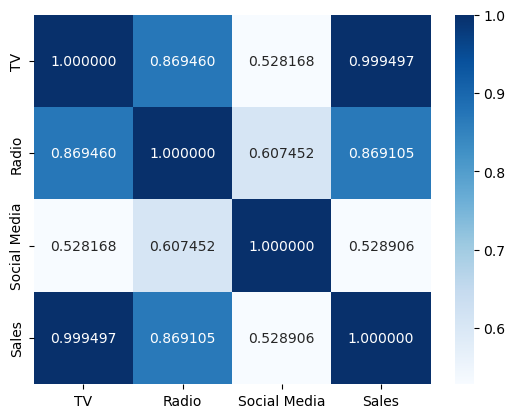

In [9]:
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='f')

From above result,We can say that 
1. Sales and TV are highly correlated,that means increasing budget on TV Ad's may result better increase in
   sales,on comapring with RAdio and Social Media
2. After TV,Sales are more correlated with Radio and then Social Media
3. As Influencer is a CATEGORICAL column,no correlation is dispalyed.


In [10]:
df['Influencer'].value_counts()

Mega     1158
Micro    1153
Nano     1139
Macro    1122
Name: Influencer, dtype: int64

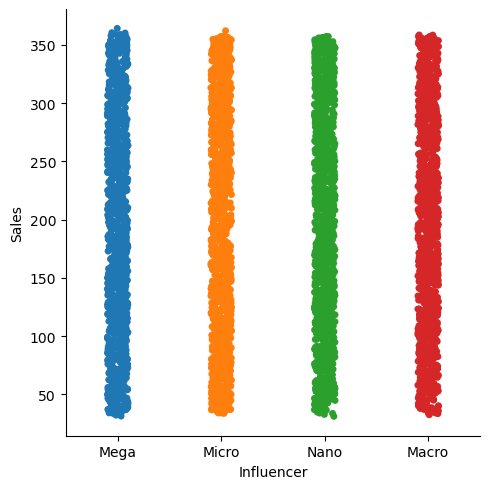

In [11]:
sns.catplot(x='Influencer',y='Sales',data=df)

From above output,we can say that\
For increase in Sales,business people had used all types of influencers equally(nearly)

In [12]:
len(df)

4572

<AxesSubplot:xlabel='TV', ylabel='Sales'>

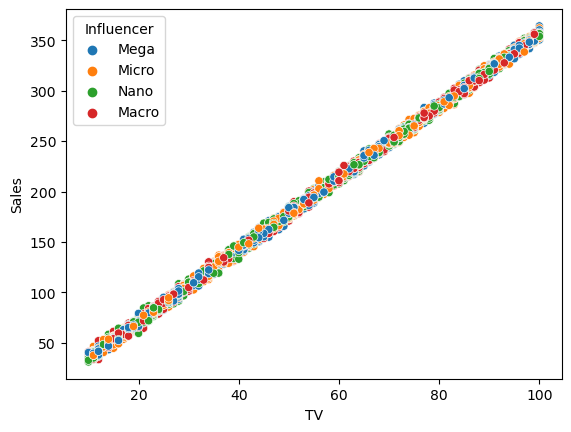

In [13]:
sns.scatterplot(x=df['TV'],y=df['Sales'],hue=df['Influencer'])

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

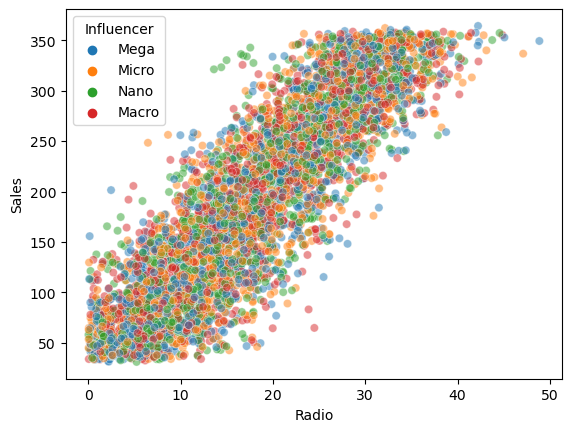

In [14]:
sns.scatterplot(x=df['Radio'],y=df['Sales'],alpha=0.5,hue=df['Influencer'])

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

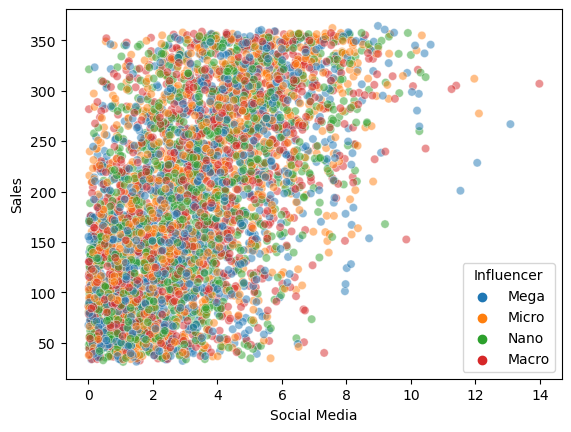

In [15]:
sns.scatterplot(x=df['Social Media'],y=df['Sales'],alpha=0.5,hue=df['Influencer'])

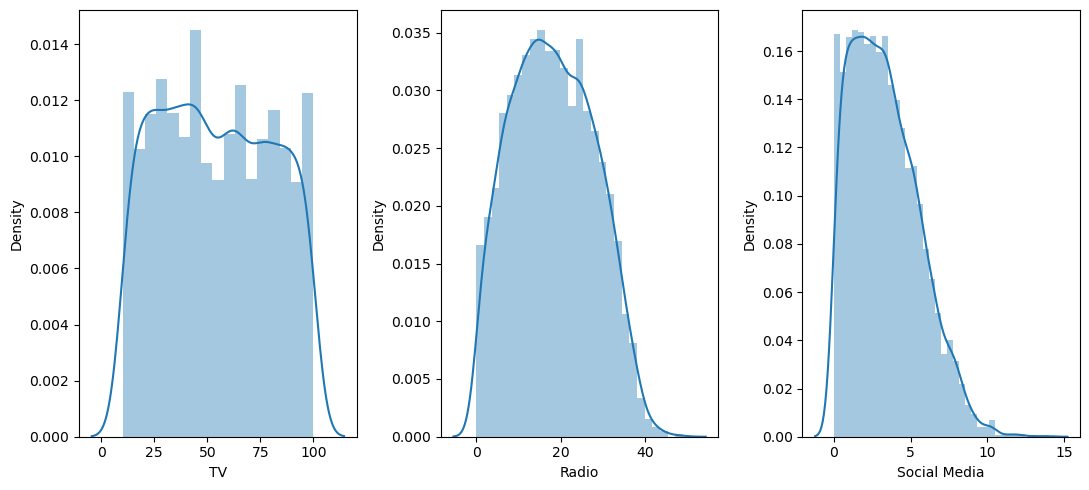

In [16]:
# plotting distribution plots
fig,ax = plt.subplots(1,3,figsize=(11,5))
sns.distplot(df['TV'],ax=ax[0])
sns.distplot(df['Radio'],ax=ax[1])
sns.distplot(df['Social Media'],ax=ax[2])
plt.tight_layout()

In [17]:
df.duplicated().sum() # Checking whether our dataframe contains duplicate rows or not

0

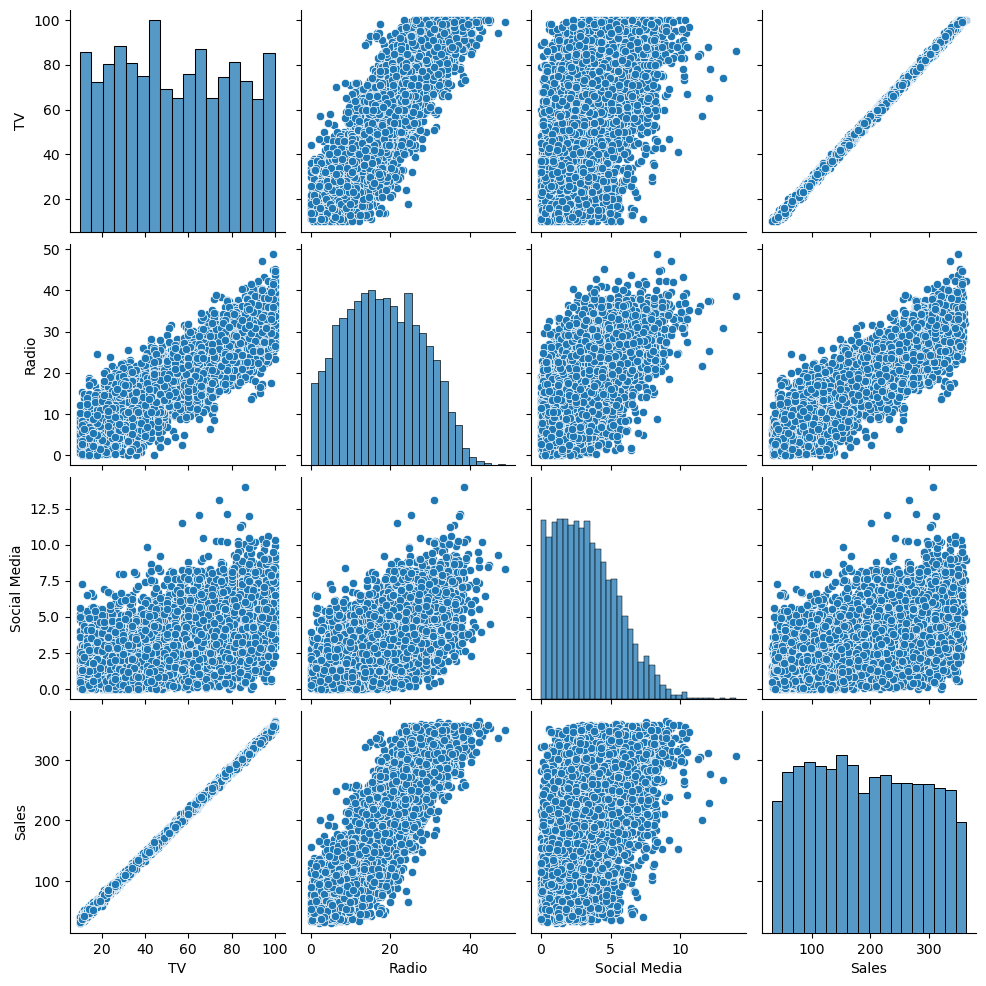

In [18]:
sns.pairplot(df)

### Dealing with Outliers 

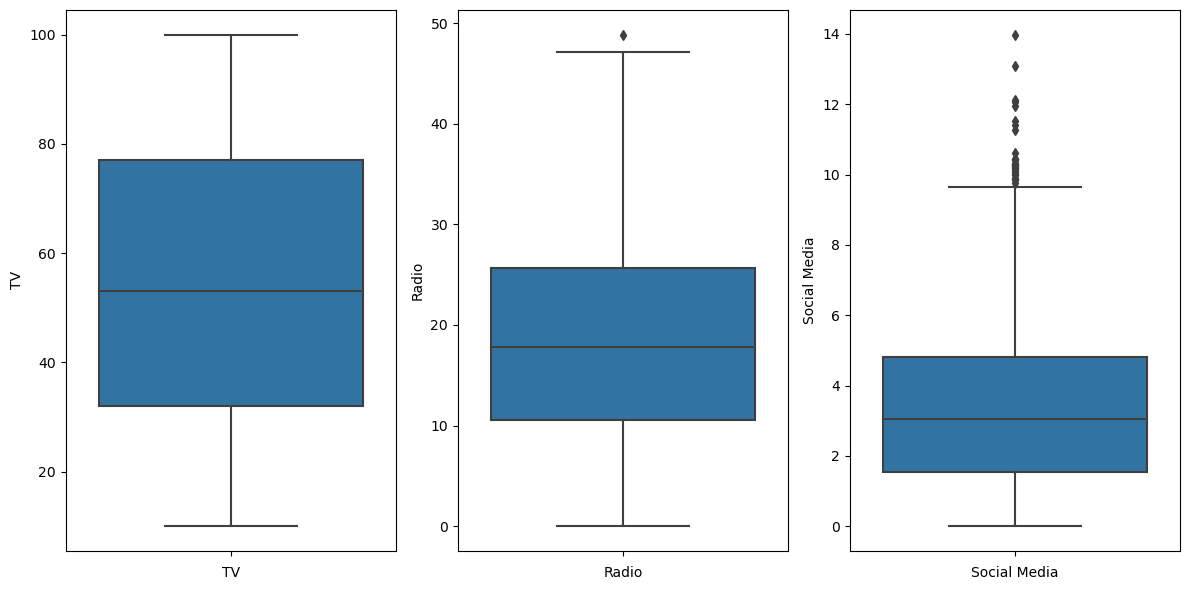

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,6))

sns.boxplot(y=df['TV'],ax=ax[0])
ax[0].set_xlabel('TV')

sns.boxplot(y=df['Radio'],ax=ax[1])
ax[1].set_xlabel('Radio')

sns.boxplot(y=df['Social Media'],ax=ax[2])
ax[2].set_xlabel('Social Media')
plt.tight_layout()

From above plots,we can say that,
1. There are no outliers in TV column
2. More outliers are there,in Social media column \
I am going to find those outliers by using IQR method

### Inter-Quartile Range Method
    IQR is used to measure variability by dividing dataset into quartiles.The data is sorted in ascending order
    and split into 4 equal parts.
    Q1,Q2,Q3 --> first, second and third quartiles
    Q1 --> represents 25th percentile of data
    Q2 --> represents 50th percentile of data
    Q3 --> represents 75th percentile of data
    IQR is the range between the first and the third quartiles
    IQR = Q3 - Q1
    The data points which fall below 'Q1 – 1.5*IQR' or above 'Q3 + 1.5*IQR' are outliers.

In [20]:
percentile_25th = df['Social Media'].quantile(0.25)
print("\033[1m"+' Q1 : 25th percentile is '+"\033[0m" ,percentile_25th)

 Q1 : 25th percentile is  1.52784868575


In [21]:
percentile_75th = df['Social Media'].quantile(0.75)
print("\033[1m"+' Q3 : 75th percentile is '+"\033[0m" ,percentile_75th)

 Q3 : 75th percentile is  4.807557994


In [22]:
IQR = percentile_75th - percentile_25th
print("\033[1m"+'Inter Quartile Range is'+"\033[0m" ,IQR)

Inter Quartile Range is 3.2797093082499997


In [23]:
upper_limit = percentile_75th + 1.5 * IQR
lower_limit = percentile_25th - 1.5 * IQR

In [24]:
print("Upper limit is ",upper_limit)
print("lower limit is ",lower_limit)

Upper limit is  9.727121956374999
lower limit is  -3.3917152766249994


Those datapoints which are above upper_limit and below lower_limit are outliers

#### Outilers in Social Media column are

In [25]:
df[df['Social Media'] > upper_limit]

,TV,Radio,Social Media,Influencer,Sales
140,95.0,36.422306,9.997472,Nano,335.301431
212,100.0,32.920194,9.904286,Nano,357.124573
468,67.0,27.533561,10.453921,Macro,242.587371
504,85.0,36.077756,11.403625,Macro,304.970625
558,95.0,43.129332,10.174983,Micro,339.871732
603,73.0,31.327127,10.260554,Nano,259.859083
867,74.0,30.967507,13.083957,Mega,266.757198
1235,94.0,39.221198,10.420853,Mega,336.888405
1363,90.0,36.551512,9.883176,Mega,317.576616
1412,84.0,34.984570,11.260430,Macro,301.493120


In [26]:
df[df['Social Media'] < lower_limit]

,TV,Radio,Social Media,Influencer,Sales


I create a new dataframe without those outliers

In [27]:
new_df = df[df['Social Media'] <= upper_limit]
# in new_df there wil be no outliers

In [28]:
new_df.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


### Dealing with Categorical Column

In [29]:
new_df['Influencer'] = new_df['Influencer'].replace(to_replace=['Nano','Micro','Macro','Mega'],value=[0,1,2,3])

In [30]:
new_df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,3,54.732757
1,13.0,9.237765,2.409567,3,46.677897
2,41.0,15.886446,2.913410,3,150.177829
3,83.0,30.020028,6.922304,3,298.246340
4,15.0,8.437408,1.405998,1,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,1,94.685866
4568,71.0,20.610685,6.545573,0,249.101915
4569,44.0,19.800072,5.096192,1,163.631457
4570,71.0,17.534640,1.940873,2,253.610411


### Dealing with NULL values

In [31]:
new_df.isnull().sum()

TV              10
Radio            4
Social Media     0
Influencer       0
Sales            6
dtype: int64

From above output,we can say that,\
     There are some NULL values in TV,Radio,Sales columns of new_df dataframe

In [32]:
# Getting percentage of NULL values in all columns
new_df.isnull().mean() 

TV              0.002204
Radio           0.000881
Social Media    0.000000
Influencer      0.000000
Sales           0.001322
dtype: float64

From above output,we can say that,\
     There are very less percent of NULL values in those columns

In [33]:
Sales_Null = new_df[new_df['Sales'].isnull()] 

In [34]:
Sales_Null # This contains those rows in which Sales are NULL

,TV,Radio,Social Media,Influencer,Sales
208,77.0,25.598379,5.514787,0,NaN
214,100.0,36.466753,5.635992,3,NaN
221,74.0,24.220634,0.285898,1,NaN
226,19.0,8.726783,0.497838,3,NaN
231,22.0,6.809752,0.011451,2,NaN
236,27.0,1.384415,2.398129,0,NaN


In [35]:
# Dropping those rows in which Sales values are NAN
new_df.drop(index=new_df[new_df['Sales'].isnull()].index,axis=0,inplace=True)

In [36]:
new_df.isnull().sum()

TV              10
Radio            4
Social Media     0
Influencer       0
Sales            0
dtype: int64

We dropped those rows in which Sales are NULL, \
For TV,Radio,,We have 2 options to do 
1. Either to drop those rows
2. Or to fill those rows \
Even if we have so many rows, 
         i am going to fill them with appropriate values by using SKLEARN

Before imputing,we are going to do
### Train_Test split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = new_df.drop('Sales',axis=1)
y = new_df['Sales']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [40]:
print('Shape of X_train is',X_train.shape)
print('Shape of X_test is',X_test.shape)
print('Shape of y_train is',y_train.shape)
print('Shape of y_test is',y_test.shape)

Shape of X_train is (3172, 4)
Shape of X_test is (1360, 4)
Shape of y_train is (3172,)
Shape of y_test is (1360,)


In X_train and X_test,for TV,Radio columns,I am going to impute Null values\
I am using Scikit-Learns's SimpleImputer and ColumnTransformer \
SIMPLEIMPUTER --> is used for imputing/replacing numerical and categorical missing data \
COLUMNTRANSFORMER --> is used to create and apply seperate transformers for numerical and categorical data

#### Importing SimpleImputer and ColumnTransformer

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [42]:
X_train.isnull().sum()

TV              7
Radio           3
Social Media    0
Influencer      0
dtype: int64

In [43]:
# Creating instance of SimpleImputer by choosing 'mean' as strategy
imputer = SimpleImputer(strategy='mean')

In [44]:
transformer = ColumnTransformer([
                        ('impute_TV',imputer,['TV']),
                        ('impute_Radio',imputer,['Radio'])
                              ],remainder='passthrough')                             
                          

In [45]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_TV', SimpleImputer(), ['TV']),
                                ('impute_Radio', SimpleImputer(), ['Radio'])])

In [46]:
transformer.named_transformers_['impute_TV'].statistics_

array([53.75671406])

In [47]:
transformer.named_transformers_['impute_Radio'].statistics_

array([17.99275155])

In [48]:
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [49]:
X_train 

array([[47.        , 20.93650521,  4.77472228,  1.        ],
       [74.        , 21.60479931,  4.66618837,  2.        ],
       [20.        ,  1.34220477,  1.90125496,  3.        ],
       ...,
       [13.        ,  2.87975334,  0.22109952,  1.        ],
       [12.        ,  5.01339024,  0.84097188,  0.        ],
       [92.        , 29.33152301,  8.14597909,  0.        ]])

In [50]:
X_test

array([[96.        , 33.98063924,  6.00367116,  2.        ],
       [40.        ,  9.95269779,  0.49815586,  0.        ],
       [40.        , 22.15892791,  1.9007215 ,  3.        ],
       ...,
       [59.        , 24.00006894,  2.34845252,  0.        ],
       [23.        ,  1.57701752,  1.07543149,  2.        ],
       [56.        , 18.73208697,  5.04561363,  2.        ]])

We filled NULL values in TV and Radio columns using Sklearn's SimpleImputer,, But our X_train and X_test became 
arrrays instead of Dataframes.

In [51]:
# Converting X_train back into DataFrame
X_train = pd.DataFrame(data=X_train,columns=['TV','Radio','Social Media',"Influencer"])
X_test = pd.DataFrame(data=X_test,columns=['TV','Radio','Social Media',"Influencer"])

In [52]:
print('Null values in X_train are ')
print(X_train.isnull().sum(),'\n')
print('Null values in X_test are ')
print(X_test.isnull().sum())

Null values in X_train are 
TV              0
Radio           0
Social Media    0
Influencer      0
dtype: int64 

Null values in X_test are 
TV              0
Radio           0
Social Media    0
Influencer      0
dtype: int64


Residuals are the difference between actual value and predicted value.We can think of it like distance
   between predicted value and actual value.
   ### Metrics for Regression
    There are so many metrics for regression,some which i used are
    1. Mean Absilute Error(MAE) : It is sum of all distances/residuals divided by total number of points in
                                  dataset
                                   
    2. Mean Sqaured Error(MSE) : It measures how close a regression line is to a set of data points.
    3. Root Mean Squared Error(RMSE) : root of mean squared error
    4. R2 Score

#### R2 Score:
            It tells how well our model is making all its predictions on a scale 0 to 1.
            We use R2 Score to determine accuracy of model in terms of distance/residual

### Importing Metrics of Regression

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Linear Regression
    Used is to predict a dependent variable value(y) based on given independent variables(X)
    This algorithm uses Ordinary Least Squares method to solve for slope and intercept.

Equation for dependent variable(y) in terms of independent variable is 


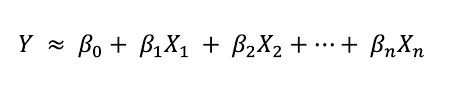

In [54]:
print("\033[1m"+'Equation for dependent variable(y) in terms of independent variable is '+"\033[0m")
Image('linear_regression_equation.jpeg',width=500)

In above equation,\
${\beta}_{0}$ --> Intercept of the regression line \
${\beta}_{0},{\beta}_{1},{\beta}_{2},...,{\beta}_{n}$ --> are slopes with respect to n number of X features.
                                                         These are co-efficients of regression model

In [55]:
# importing LinearRegression from SKLEARN
from sklearn.linear_model import LinearRegression

# Creating instance of LinearRegression with default values
linear_model = LinearRegression()

# Fitting our linear model with X_train and y_train
linear_model.fit(X_train,y_train)

LinearRegression()

In [56]:
print("\033[1m"+'Co-efficients of linear model are :'+"\033[0m",linear_model.coef_)
print("\033[1m"+'Intercept of linear model are :'+"\033[0m",linear_model.intercept_)
print("\033[1m"+'Rank of linear model is :'+"\033[0m",linear_model.rank_)

Co-efficients of linear model are : [3.51562352 0.13066638 0.08333902 0.03376543]
Intercept of linear model are : -0.34229771229840367
Rank of linear model is : 4


In [57]:
# Predicting for X_test using linear_model
linear_model_predictions = linear_model.predict(X_test)
# Printing Metrics
print("\033[1m"+'\tFor Linear Regression')
print("\033[1m"+'Mean Absolute Error :'+"\033[0m" ,mean_absolute_error(y_test,linear_model_predictions))
print("\033[1m"+'Mean Squared Error :'+"\033[0m" ,mean_squared_error(y_test,linear_model_predictions))
print("\033[1m"+'Root Mean Squared Error :'+"\033[0m",np.sqrt(mean_squared_error(y_test,linear_model_predictions)))     
print("\033[1m"+'R2_Score :'+"\033[0m" ,r2_score(y_test,linear_model_predictions))

	For Linear Regression
Mean Absolute Error : 2.6661728951751873
Mean Squared Error : 38.670910870814005
Root Mean Squared Error : 6.218593962529955
R2_Score : 0.9955276604409827


### Linear Regression with Cross Validation(Cross_Val_Score)
    Cross-Validation is a technique in which we train our model using SUBSET of dataset and then evaluate 
    using complementary subset of dataset
#### K-fold Cross Validation
    In this method,
    Dataset gets splitted into 'k' number of subsets(folds),then we perform training on all subsets but leaving     one(k-1) subset,which we use for evaluation of trained model
#### Cross_Val_Score
    It runs cross-validation and,,returns a list of one score per split,,average of these scores provide a 
    single metric value for dataset

In [58]:
basic_linear_model = LinearRegression()

# importing cross_val_score 
from sklearn.model_selection import cross_val_score

# cv=5 means dataset splits into 5 folds 
scores = cross_val_score(basic_linear_model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print("\033[1m" +'Mean Squared Errors with Cross Validated linear regression model are'+ "\033[0m"'\n',scores)

# Printing Average error
print("\033[1m" +'Average mean squared error with Cross Validated linear regression model is :'+ "\033[0m",abs(scores.mean()))

Mean Squared Errors with Cross Validated linear regression model are
 [-24.2797388  -34.38427672 -70.22856705 -37.43619664 -45.06073774]
Average mean squared error with Cross Validated linear regression model is : 42.27790338990954


### Lasso Regression(L1 Regression)
    This regularization adds penalty term equal to absolute value of magnitude of coefficients to the error term    It limits size of co-efficients.  

Error function for Lasso regression is


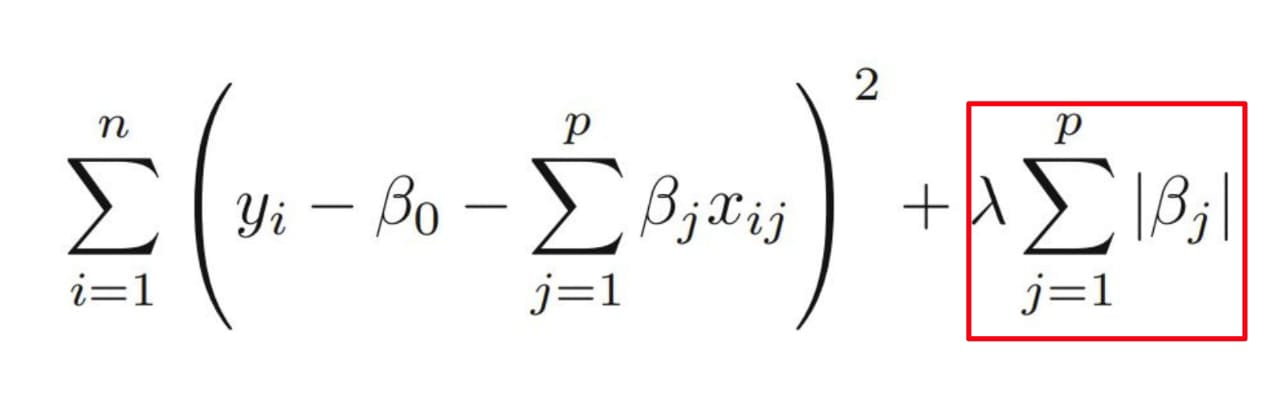

In [59]:
print('\033[1m'+'Error function for Lasso regression is')
Image('lasso_regression_error_formula.jpeg',width=500)

In [60]:
# importing Lasso from SKLEARN
from sklearn.linear_model import Lasso

# Creating instance of Lasso Regression with default values
lasso_model = Lasso()

# Fitting our lasso_model with X-train and y_train
lasso_model.fit(X_train,y_train)

Lasso()

In [61]:
print('\033[1m''Co-efficients of Lasso are'+ "\033[0m"'\n',lasso_model.coef_)
print('\033[1m''Lasso model intercept :'+ "\033[0m",lasso_model.intercept_)

Co-efficients of Lasso are
 [3.52421719 0.11069786 0.         0.        ]
Lasso model intercept : -0.11799058995541145


In [62]:
# Predicting for X_test using lasso_model
lasso_predictions1 = lasso_model.predict(X_test)

# Evaluating Metrics
print("\033[1m"+'\tFor Lasso Regression')
print("\033[1m"+'Mean Absolute Error :'+"\033[0m" ,mean_absolute_error(y_test,lasso_predictions1))
print("\033[1m"+'Mean Sqaured Error :'+"\033[0m" ,mean_squared_error(y_test,lasso_predictions1))
print("\033[1m"+'Root Mean Squared Error :'+"\033[0m" ,np.sqrt(mean_squared_error(y_test,lasso_predictions1)))     
print("\033[1m"+'R2 Score :'+"\033[0m" ,r2_score(y_test,lasso_predictions1))

	For Lasso Regression
Mean Absolute Error : 2.641585626647138
Mean Sqaured Error : 38.68377576072804
Root Mean Squared Error : 6.219628265477612
R2 Score : 0.9955261726002572


### Lasso Regression with GridSearchCV

In [63]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Creating instance of LassoRegression with default values
basic_lasso_model = Lasso()

# Creating param_grid for Lasso Regression
lasso_param_grid = {'alpha':[0,0.5,1,5,10,20,50],
                  'max_iter':[100,300,500,1000]}

# Creating lasso_grid_model
lasso_grid_model = GridSearchCV(basic_lasso_model,param_grid=lasso_param_grid,scoring='neg_mean_squared_error'
                              ,cv=5,verbose=2)

# Fitting the gridsearchcv model
lasso_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ..............................alpha=0, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=500; total time=   0.0s
[CV] END ..............................alpha=0,

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 0.5, 1, 5, 10, 20, 50],
                         'max_iter': [100, 300, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [64]:
print("\033[1m"+'Best Estimators of model are'+"\033[0m"'\n',lasso_grid_model.best_estimator_)
print("\033[1m"+'Mean Cross Validated score of best_estimator is :'+"\033[0m",lasso_grid_model.best_score_)

Best Estimators of model are
 Lasso(alpha=0.5, max_iter=100)
Mean Cross Validated score of best_estimator is : -42.26090916175051


In [65]:
# Making predictions using lasso_grid_model
lasso_predictions2 = lasso_grid_model.predict(X_test)

# Evaluationg Metrics
print("\033[1m"+'\t For Lasso Regression with GridSearchCV')
print("\033[1m"+'Mean Absolute Error :'+"\033[0m",mean_absolute_error(y_test,lasso_predictions2))
print("\033[1m"+'Mean Squared Error :'+"\033[0m",mean_squared_error(y_test,lasso_predictions2))
print("\033[1m"+'Root Mean Squared Error :'+"\033[0m",np.sqrt(mean_squared_error(y_test,lasso_predictions2)))
print("\033[1m"+'R2 Score :'+"\033[0m",r2_score(y_test,lasso_predictions2))

	 For Lasso Regression with GridSearchCV
Mean Absolute Error : 2.6516877293026666
Mean Squared Error : 38.658673858891774
Root Mean Squared Error : 6.217609979637817
R2 Score : 0.9955290756668275


### Ridge Regression(L2 Regularization)
    This is a regularization technique that works by reducing the potential for Over-Fitting to training data
    It does that by adding penalty term to the error that is based on squared value of coefficients

Error function for Ridge regression is


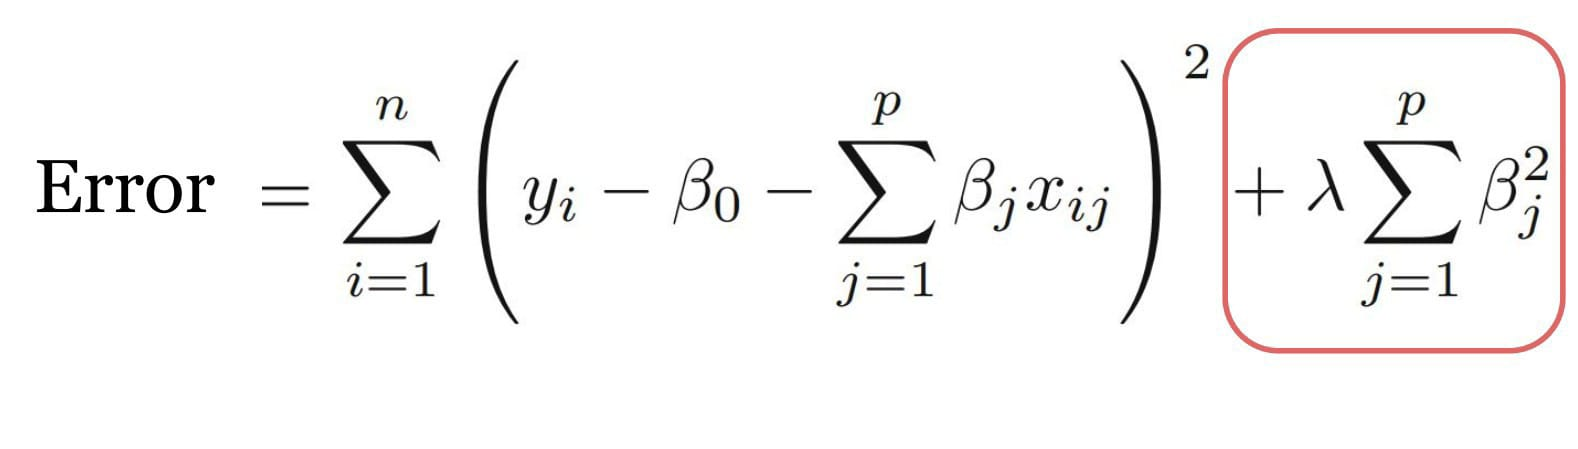

In [66]:
print('\033[1m'+'Error function for Ridge regression is')
Image('ridge_regression_error_formula.jpeg',width=600)

In [67]:
# importing Ridge from SKLEARN
from sklearn.linear_model import Ridge

# Creating instance of Ridge Regression with default values
ridge_model = Ridge()

# Fitting our ridge_model with X-train and y_train
ridge_model.fit(X_train,y_train)

Ridge()

In [68]:
print('\033[1m''Co-efficients of Ridge are'+ "\033[0m"'\n',ridge_model.coef_)
print('\033[1m''Ridge model intercept :'+ "\033[0m",ridge_model.intercept_)

Co-efficients of Ridge are
 [3.51561763 0.13068062 0.08333324 0.03375663]
Ridge model intercept : -0.34220502534111574


In [69]:
# Predicting for X_test using ridge_model
ridge_predictions1 = ridge_model.predict(X_test)

# Evaluating Metrics
print("\033[1m"+'\tFor Ridge Regression')
print("\033[1m"+'Mean Absolute Error :'+"\033[0m" ,mean_absolute_error(y_test,ridge_predictions1))
print("\033[1m"+'Mean Sqaured Error :'+"\033[0m" ,mean_squared_error(y_test,ridge_predictions1))
print("\033[1m"+'Root Mean Squared Error :'+"\033[0m" ,np.sqrt(mean_squared_error(y_test,ridge_predictions1)))     
print("\033[1m"+'R2 Score :'+"\033[0m" ,r2_score(y_test,ridge_predictions1))

	For Ridge Regression
Mean Absolute Error : 2.6661848029583664
Mean Sqaured Error : 38.67090096025337
Root Mean Squared Error : 6.218593165680914
R2 Score : 0.9955276615871516


### Ridge Regression with GridSearchCV

In [70]:
# Creating instance of RidgeRegression with default values
basic_ridge_model = Ridge()

# Creating param_grid for Ridge Regression
ridge_param_grid = {'alpha':[0,0.5,1,5,10,20,50],
                  'max_iter':[100,300,500,1000]}

# Creating ridge_grid_model
ridge_grid_model = GridSearchCV(basic_ridge_model,param_grid=ridge_param_grid,scoring='neg_mean_squared_error'
                              ,cv=5,verbose=2)

# Fitting model with X_train and y_train
ridge_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ..............................alpha=0, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=500; total time=   0.0s
[CV] END ..............................alpha=0,

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 0.5, 1, 5, 10, 20, 50],
                         'max_iter': [100, 300, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [71]:
print("\033[1m"+'Best Estimators of model are'+"\033[0m"'\n',ridge_grid_model.best_estimator_)
print("\033[1m"+'Mean Cross Validated score of best_estimator is :'+"\033[0m",ridge_grid_model.best_score_)

Best Estimators of model are
 Ridge(alpha=50, max_iter=100)
Mean Cross Validated score of best_estimator is : -42.27727291043401


In [72]:
# Making predictions
ridge_predictions2 = ridge_grid_model.predict(X_test)

# Evaluating Metrics
print("\033[1m"+'\tFor Lasso Regression with GridSearchCV')
print("\033[1m"+'Mean Absolute Error :'+"\033[0m",mean_absolute_error(y_test,ridge_predictions2))
print("\033[1m"+'Mean Squared Error :'+"\033[0m",mean_squared_error(y_test,ridge_predictions2))
print("\033[1m"+'Root Mean Squared Error :'+"\033[0m",np.sqrt(mean_squared_error(y_test,ridge_predictions2)))
print("\033[1m"+'R2 Score :'+"\033[0m",r2_score(y_test,ridge_predictions2))

	For Lasso Regression with GridSearchCV
Mean Absolute Error : 2.6667679621410874
Mean Squared Error : 38.67043349563995
Root Mean Squared Error : 6.218555579524875
R2 Score : 0.995527715650023


### ElasticNet Regression(L1 and L2 Regularizations)
    This technique uses penalties from both lasso and ridge techniques to regularize regression model.

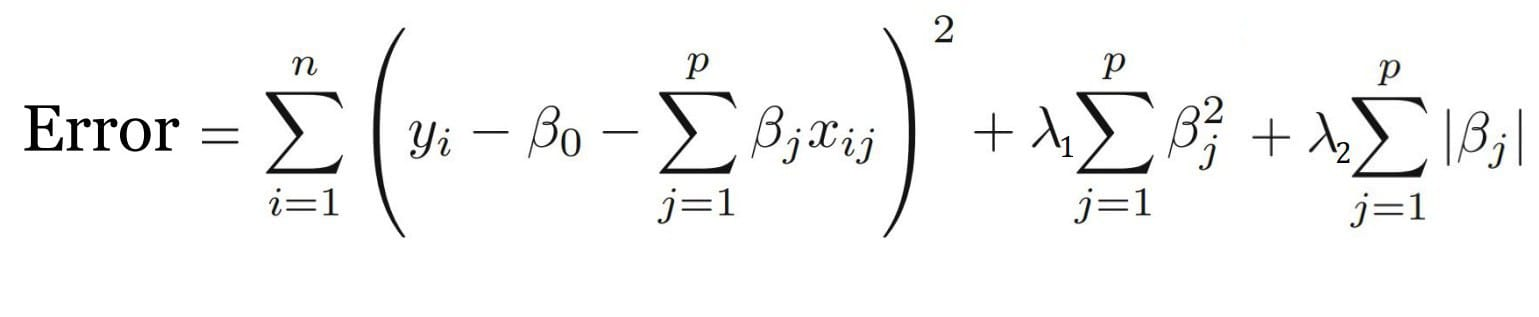

In [73]:
Image('elasticnet_error_formula.jpeg',width=700)

In [74]:
# importing ElasticNet from SKLEARN
from sklearn.linear_model import ElasticNet

# Creating instance of ElasticNet Regression with default values
elasticnet_model = ElasticNet()

# Fitting the model
elasticnet_model.fit(X_train,y_train)

ElasticNet()

In [75]:
print('\033[1m''Co-efficients of Ridge are'+ "\033[0m"'\n',elasticnet_model.coef_)
print('\033[1m''Ridge model intercept :'+ "\033[0m",elasticnet_model.intercept_)

Co-efficients of Ridge are
 [3.51106165 0.14647311 0.         0.        ]
Ridge model intercept : -0.05448720346691971


In [76]:
# Making predictions
elasticnet_predictions1 = elasticnet_model.predict(X_test)

# Evaluating Metrics
print("\033[1m"+'\tFor ElasticNet Regression')
print("\033[1m"+'Mean Absolute Error :'+"\033[0m" ,mean_absolute_error(y_test,elasticnet_predictions1))
print("\033[1m"+'Mean Sqaured Error :'+"\033[0m" ,mean_squared_error(y_test,elasticnet_predictions1))
print("\033[1m"+'Root Mean Squared Error :'+"\033[0m" ,np.sqrt(mean_squared_error(y_test,elasticnet_predictions1)))     
print("\033[1m"+'R2 Score :'+"\033[0m" ,r2_score(y_test,elasticnet_predictions1))

	For ElasticNet Regression
Mean Absolute Error : 2.6699809288299816
Mean Sqaured Error : 38.65279455314346
Root Mean Squared Error : 6.217137166987991
R2 Score : 0.9955297556159438


### ElasticNet with GridSearchCV 

In [77]:
# Creating instance of ElasticNet Regression with default values
basic_elasticnet_model = ElasticNet()

# Creating param_grid for ElasticNet Regression
elasticnet_param_grid={'alpha':[0,0.1,0,5,1,5,10,50,100],
                       'l1_ratio':[0,0.1,0.2,0.25,0.5,0.75,0.9,1],
                  'max_iter':[100,300,500,1000]}

# Creating elasticnet_grid_model
elasticnet_grid_model = GridSearchCV(basic_elasticnet_model,param_grid=elasticnet_param_grid,scoring='neg_mean_squared_error'
                              ,cv=5,verbose=2)

# Fitting the model
elasticnet_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END ..................alpha=0, l1_ratio=0, max_iter=100; total time=   0.0s
[CV] END ..................alpha=0, l1_ratio=0, max_iter=100; total time=   0.0s
[CV] END ..................alpha=0, l1_ratio=0, max_iter=100; total time=   0.0s
[CV] END ..................alpha=0, l1_ratio=0, max_iter=100; total time=   0.0s
[CV] END ..................alpha=0, l1_ratio=0, max_iter=100; total time=   0.0s
[CV] END ..................alpha=0, l1_ratio=0, max_iter=300; total time=   0.0s
[CV] END ..................alpha=0, l1_ratio=0, max_iter=300; total time=   0.0s
[CV] END ..................alpha=0, l1_ratio=0, max_iter=300; total time=   0.0s
[CV] END ..................alpha=0, l1_ratio=0, max_iter=300; total time=   0.0s
[CV] END ..................alpha=0, l1_ratio=0, max_iter=300; total time=   0.0s
[CV] END ..................alpha=0, l1_ratio=0, max_iter=500; total time=   0.0s
[CV] END ..................alpha=0, l1_ratio=

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0, 0.1, 0, 5, 1, 5, 10, 50, 100],
                         'l1_ratio': [0, 0.1, 0.2, 0.25, 0.5, 0.75, 0.9, 1],
                         'max_iter': [100, 300, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [78]:
print("\033[1m"+'Best Estimators of model are'+"\033[0m"'\n',elasticnet_grid_model.best_estimator_)
print("\033[1m"+'Mean Cross Validated score of best_estimator is :'+"\033[0m",elasticnet_grid_model.best_score_)

Best Estimators of model are
 ElasticNet(alpha=0.1, l1_ratio=1, max_iter=100)
Mean Cross Validated score of best_estimator is : -42.25362783073714


In [79]:
# Making predictions
elasticnet_predictions2 = elasticnet_grid_model.predict(X_test)

# Evaluating Metrics
print("\033[1m"+'\tFor ElasticNet Regression with GridSearchCV')
print("\033[1m"+'Mean Absolute Error :'+"\033[0m",mean_absolute_error(y_test,elasticnet_predictions2))
print("\033[1m"+'Mean Squared Error :'+"\033[0m",mean_squared_error(y_test,elasticnet_predictions2))
print("\033[1m"+'Root Mean Squared Error :'+"\033[0m",np.sqrt(mean_squared_error(y_test,elasticnet_predictions2)))
print("\033[1m"+'R2 Score :'+"\033[0m",r2_score(y_test,elasticnet_predictions2))

	For ElasticNet Regression with GridSearchCV
Mean Absolute Error : 2.6617102418047454
Mean Squared Error : 38.64904357567876
Root Mean Squared Error : 6.216835495304565
R2 Score : 0.9955301894212131


On comparing metrics for all models,
elasticnet_grid_model has low MSE(on comparing with others).
We can use it,for final predictions.

### Final Model

In [80]:
# Creating final model with best estimators of ElasticNet model 
final_model = ElasticNet(alpha=0.1, l1_ratio=1, max_iter=100)

# Fitting the model
final_model.fit(X_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=1, max_iter=100)

In [81]:
print('\033[1m''Co-efficients of Final ElasticNet model are'+ "\033[0m"'\n',final_model.coef_)
print('\033[1m''Final ElasticNet model intercept :'+ "\033[0m",final_model.intercept_)

Co-efficients of Final ElasticNet model are
 [3.51688026 0.13063647 0.05365483 0.        ]
Final ElasticNet model intercept : -0.26008449662714384


In [82]:
# Making predictions
final_predictions = final_model.predict(X_test) 

# Evaluating Metrics
print("\033[1m"+'\tFor final ElasticNet Regression model')
print("\033[1m"+'Mean Absolute Error :'+"\033[0m" ,mean_absolute_error(y_test,final_predictions))
print("\033[1m"+'Mean Sqaured Error :'+"\033[0m" ,mean_squared_error(y_test,final_predictions))
print("\033[1m"+'Root Mean Squared Error :'+"\033[0m" ,np.sqrt(mean_squared_error(y_test,final_predictions)))     
print("\033[1m"+'R2 Score :'+"\033[0m" ,r2_score(y_test,final_predictions))

	For final ElasticNet Regression model
Mean Absolute Error : 2.6617102418047454
Mean Sqaured Error : 38.64904357567876
Root Mean Squared Error : 6.216835495304565
R2 Score : 0.9955301894212131


In [83]:
# Creating a DataFrame of final model's co-efficients
Coefficients_df = pd.DataFrame(data=final_model.coef_,index=X.columns,columns=['Co-Efficient'])
Coefficients_df

,Co-Efficient
TV,3.516880
Radio,0.130636
Social Media,0.053655
Influencer,0.000000


From above co-efficients_df,
1. Sales will increase on increasing Ad's on TV.
2. There is no need to spend too much on Radio,Social Media

#### Predicting Sales in Sales_Null dataframe 

In [84]:
X1 = Sales_Null.drop('Sales',axis=1) # Dropping Sales(y)

In [85]:
Sales = final_model.predict(X1)
Sales

array([274.17967261, 356.49422795, 263.16849284,  67.72738801,
        78.00149759,  95.00520901])

In [86]:
# Printing values of Sales column in Sales_Null column
Sales_Null['Sales'].values 

array([nan, nan, nan, nan, nan, nan])

In [87]:
# Replacing Null values with predicted values
Sales_Null['Sales'] = Sales

In [88]:
Sales_Null

,TV,Radio,Social Media,Influencer,Sales
208,77.0,25.598379,5.514787,0,274.179673
214,100.0,36.466753,5.635992,3,356.494228
221,74.0,24.220634,0.285898,1,263.168493
226,19.0,8.726783,0.497838,3,67.727388
231,22.0,6.809752,0.011451,2,78.001498
236,27.0,1.384415,2.398129,0,95.005209
